<a href="https://colab.research.google.com/github/soniapetrini/gas_pricing_EU/blob/main/Final_Edition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Loading**

In [5]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
from google.colab import drive
drive.mount('/content/drive')
!git clone https://github.com/soniapetrini/gas_pricing_EU.git
path = '/content/'
%cd gas_pricing_EU

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
fatal: destination path 'gas_pricing_EU' already exists and is not an empty directory.
[Errno 2] No such file or directory: 'gas_pricing_EUgas_pricing_EU'
/content


In [7]:
!git pull

fatal: not a git repository (or any of the parent directories): .git


# **Price Data**

In [4]:
brent = pd.read_csv("/content/gas_pricing_EU/Data/brent_oil_all.csv")

In [ ]:
brent['month']= pd.to_datetime(brent['Date']).dt.to_period("M")

In [ ]:
brent = brent.groupby('month').mean()

In [ ]:
brent

,Open,High,Low,Close,Volume,Dividends,Stock Splits
month,,,,,,,
2007-07,75.775000,76.850000,75.555000,76.395000,3044.000000,0.0,0.0
2007-08,71.391304,72.037826,70.489130,71.258696,4436.173913,0.0,0.0
2007-09,76.680526,77.599474,76.128947,77.135263,3265.368421,0.0,0.0
2007-10,81.946522,82.999130,81.205652,82.456957,3216.260870,0.0,0.0
2007-11,92.202500,93.004000,90.880500,91.876000,2011.700000,0.0,0.0
...,...,...,...,...,...,...,...
2020-11,43.002105,44.049474,42.529474,43.478421,33261.000000,0.0,0.0
2020-12,49.883500,50.609500,49.309500,50.095000,25824.400000,0.0,0.0
2021-01,55.077895,55.982632,54.490526,55.351579,30851.842105,0.0,0.0


In [ ]:
ttf = pd.read_csv('/content/gas_pricing_EU/Data/TTF_Quandl.csv')

In [ ]:
ttf['month'] = pd.to_datetime(ttf['Date']).dt.to_period("M")

In [ ]:
ttf = ttf.groupby("month").mean()

In [ ]:
import_price = pd.read_csv("/content/gas_pricing_EU/Data/import_price_month.csv")

In [ ]:
import_price['month'] = pd.to_datetime(import_price['month']).dt.to_period("M")

In [ ]:
import_price.index = import_price['month']

In [ ]:
coal = pd.read_csv('coal.csv')

In [ ]:
coal['month'] = pd.to_datetime(coal['Date']).dt.to_period("M")

In [ ]:
coal.index = coal['month']

In [ ]:
exchange = pd.read_csv("/content/gas_pricing_EU/Data/eurusd.csv")

In [ ]:
exchange['month']= pd.to_datetime(exchange['Date']).dt.to_period("M")

In [ ]:
exchange = exchange.groupby('month').mean()

In [ ]:
exchange

,eurusd_close
month,
2014-02,1.365286
2014-03,1.382566
2014-04,1.380623
2014-05,1.374598
2014-06,1.359689
...,...
2020-10,1.176977
2020-11,1.182952
2020-12,1.216249


In [ ]:
data_p = pd.concat([ttf['Settle'], brent['Close'], import_price['import_price_gas'],coal['coal'],exchange['eurusd_close']], axis =1)
data_p.columns = ['ttf', 'brent', 'import_price_gas', 'coal_price', 'exchange_rate']

In [ ]:
data_p

,ttf,brent,import_price_gas,coal_price
month,,,,
1960-01,NaN,NaN,0.4048,NaN
1960-02,NaN,NaN,0.4048,NaN
1960-03,NaN,NaN,0.4048,NaN
1960-04,NaN,NaN,0.4048,NaN
1960-05,NaN,NaN,0.4048,NaN
...,...,...,...,...
2021-01,20.34480,55.351579,7.2683,68.392105
2021-02,17.36515,62.203158,6.1585,65.239474
2021-03,15.82600,66.341429,6.1271,NaN


# **Seasonal Data**

In [ ]:
def country_name(a):
  if a == "BE":
    return "Belgium"
  if a == "BG":
    return "Bulgaria"
  if a == "CZ":
    return "Czechia"
  if a == "DK":
    return "Denmark"
  if a == "DE":
    return "Germany"
  if a == "EE":
    return "Estonia"
  if a == "IE":
    return "Ireland"
  if a == "EL":
    return "Greece"
  if a == "FR":
    return "France"
  if a == "ES":
    return "Spain"
  if a == "HR":
    return "Croatia"
  if a == "IT":
    return "Italy"
  if a == "LV":
    return "Latvia"
  if a == "LT":
    return "Lithuania"
  if a == "HU":
    return "Hungary"
  if a == "NL":
    return "Netherlands"
  if a == "AT":
    return "Austria"
  if a == "PL":
    return "Poland"
  if a == "PT":
    return "Portugal"
  if a == "RO":
    return "Romania"
  if a == "SI":
    return "Slovenia"
  if a == "SK":
    return "Slovakia"
  if a == "FI":
    return "Finland"
  if a == "SE":
    return "Sweden"
  if a == "UK":
    return "United Kingdom"
  if a == "TR":
    return "Turkey"
  else:
    return "Others"

In [ ]:
def clean_mean(df):
  df['geo'] = df['geo'].apply(country_name) # select 26 countries
  df['month'] = pd.to_datetime(df['TIME_PERIOD']).dt.to_period("M")
  df = df[df['geo']!= 'Others']
  df = df.groupby("month").mean()
  df['month'] = df.index
  return df

In [ ]:
def clean_sum(df):
  df['geo'] = df['geo'].apply(country_name) # select 26 countries
  df['month'] = pd.to_datetime(df['TIME_PERIOD']).dt.to_period("M")
  df = df[df['geo']!= 'Others']
  df = df.groupby("month").sum()
  df['month'] = df.index
  return df

## Heating Data

In [ ]:
from dateutil.parser import parse
heating = pd.read_csv("/content/gas_pricing_EU/Data/heating_degree.csv")

In [ ]:
heating = clean_mean(heating)

In [ ]:
heating.to_csv("heating.csv")

In [ ]:
from dateutil.parser import parse
heating = pd.read_csv('heating.csv', parse_dates=['month'], index_col='month')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add_heating = seasonal_decompose(heating['OBS_VALUE'], model='additive', extrapolate_trend='freq') # Additive Decomposition
des_heating = pd.DataFrame(heating.OBS_VALUE.values - result_add_heating.seasonal)

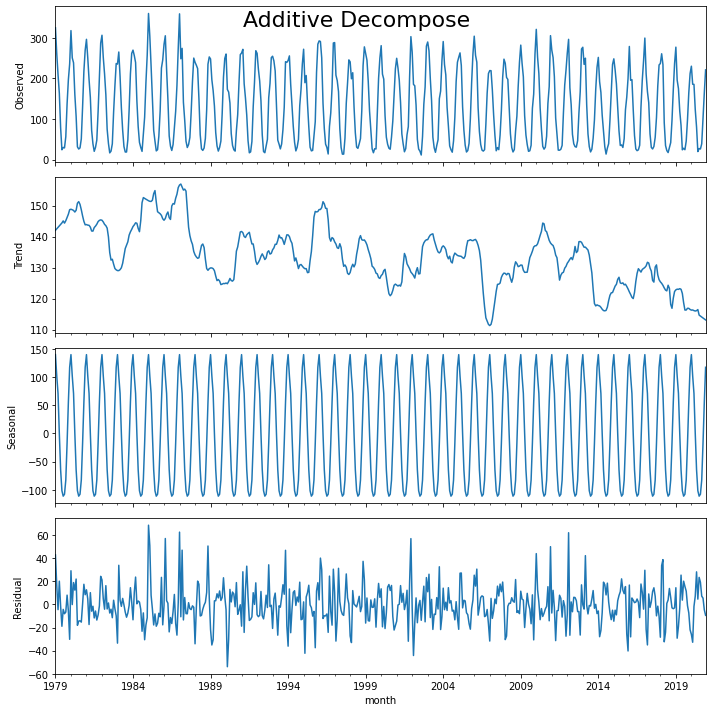

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize': (10,10)})
result_add_heating.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [ ]:
des_heating = des_heating.reset_index()
des_heating['month'] = des_heating['month'].dt.to_period("M")

In [ ]:
des_heating.columns = ['month', 'des_heating']
des_heating.index = des_heating['month']

In [ ]:
heating.index = des_heating.index

In [ ]:
des_heating['heating'] = heating['OBS_VALUE']

## Storage Data

In [ ]:
storage = pd.read_csv("storage.csv")

In [ ]:
storage = clean_sum(storage)

In [ ]:
storage.to_csv("for_storage.csv")
storage = pd.read_csv('for_storage.csv', parse_dates=['month'], index_col='month')

In [ ]:
result_add_storage = seasonal_decompose(storage['OBS_VALUE'], model='additive', extrapolate_trend='freq') # Additive Decomposition
des_storage = pd.DataFrame(storage.OBS_VALUE.values - result_add_storage.seasonal)

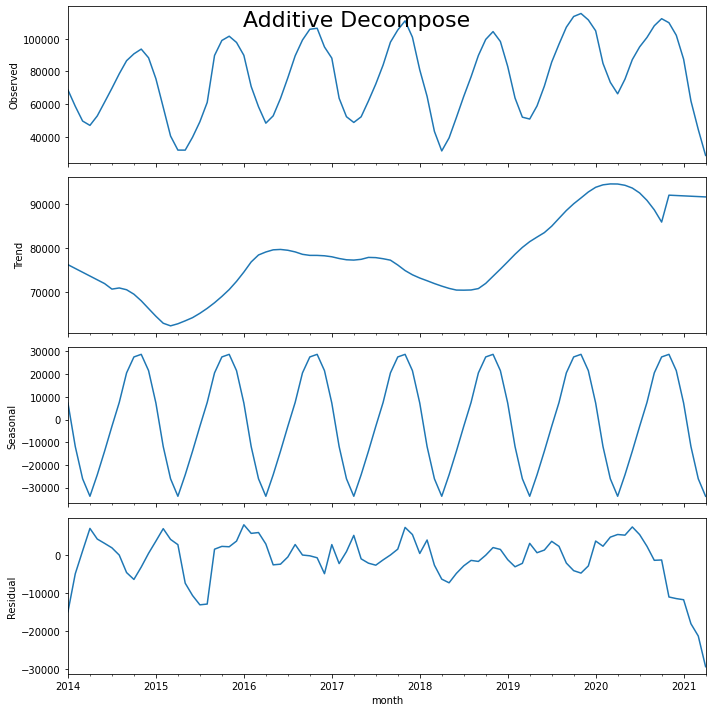

In [ ]:
plt.rcParams.update({'figure.figsize': (10,10)})
result_add_storage.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [ ]:
des_storage = des_storage.reset_index()
des_storage['month'] = des_storage['month'].dt.to_period("M")
des_storage.columns = ['month', 'des_storage']

In [ ]:
des_storage.index = des_storage['month']

In [ ]:
storage.index = des_storage.index

In [ ]:
des_storage['storage'] = storage['OBS_VALUE']

## Demand Data

In [ ]:
c = pd.read_csv("/content/gas_pricing_EU/Data/supply, transformation and consumption.csv")
e = pd.read_csv("/content/gas_pricing_EU/Data/export.csv")
i = pd.read_csv("/content/gas_pricing_EU/Data/import.csv")

In [ ]:
c = clean_sum(c)
e = clean_sum(e)
i = clean_sum(i)

In [ ]:
demand = pd.concat([c['OBS_VALUE'], e['OBS_VALUE'], i['OBS_VALUE'], c['month']],axis =1)

In [ ]:
demand.columns = ['consumption', 'export', 'import', 'month']

In [ ]:
demand['demand'] = demand['consumption'] + demand['export'] - demand['import']

In [ ]:
demand.to_csv("demand.csv")
demand = pd.read_csv('demand.csv', parse_dates=['month'], index_col='month')

In [ ]:
result_add_demand = seasonal_decompose(demand['demand'], model='additive', extrapolate_trend='freq') # Additive Decomposition
des_demand = pd.DataFrame(demand.demand.values - result_add_demand.seasonal)

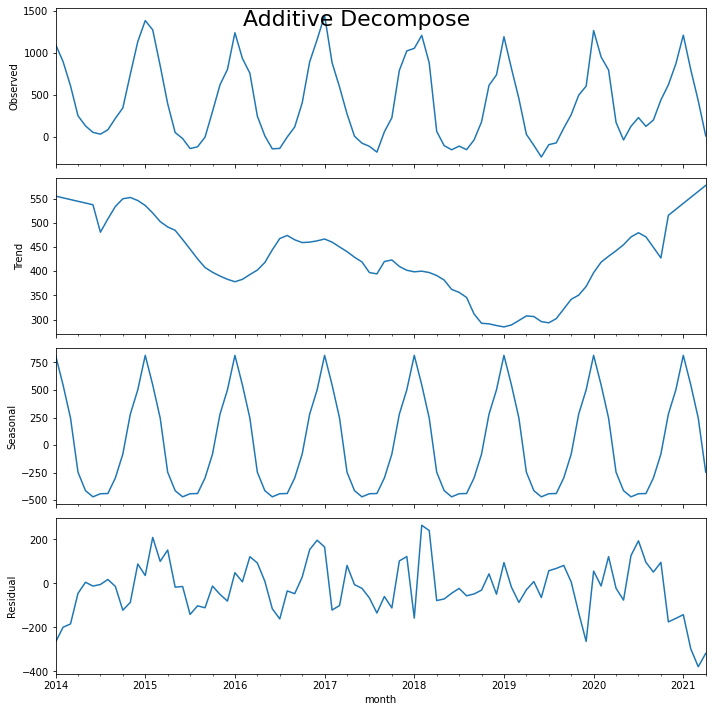

In [ ]:
plt.rcParams.update({'figure.figsize': (10,10)})
result_add_demand.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [ ]:
des_demand = des_demand.reset_index()
des_demand['month'] = des_demand['month'].dt.to_period("M")
des_demand.columns = ['month', 'des_demand']

In [ ]:
des_demand.index = des_demand['month']

In [ ]:
demand.index = des_demand.index

In [ ]:
des_demand['demand'] = demand['demand']

# **Data Summary**

In [ ]:
data_season = pd.concat([des_heating[['des_heating', 'heating']], des_storage[['des_storage','storage']], des_demand[['des_demand', 'demand']]], axis =1)

In [ ]:
data_season = data_season.dropna()

In [ ]:
data_p = data_p.dropna()

In [ ]:
data_season

,des_heating,heating,des_storage,storage,des_demand,demand
month,,,,,,
2014-01,112.136333,251.661667,61448.314207,68691.000,288.334359,1102.747692
2014-02,89.758708,191.655417,70578.293818,58677.000,352.489012,898.576923
2014-03,94.716456,165.501250,75730.837814,49656.000,364.027330,609.346154
2014-04,109.484086,109.102083,80780.065509,46999.000,499.223059,253.615385
2014-05,135.508462,71.290833,77124.449256,52790.000,546.123982,132.884615
...,...,...,...,...,...,...
2020-08,133.660994,26.067917,93277.231339,100794.186,566.492671,127.177594
2020-09,121.295249,38.826250,87429.251535,107954.830,500.820834,202.861537
2020-10,119.282031,101.838958,84745.235398,112281.744,522.992916,441.466063


In [ ]:
data = pd.concat([data_p, data_season], axis =1)

In [ ]:
data = data.dropna()

In [ ]:
data

,ttf,brent,import_price_gas,coal_price,exchange_rate,des_heating,heating,des_storage,storage,des_demand,demand
month,,,,,,,,,,,
2014-02,24.006737,108.706111,11.3000,73.700000,1.365286,89.758708,191.655417,70578.293818,58677.000,352.489012,898.576923
2014-03,23.150048,107.857619,10.8800,75.800000,1.382566,94.716456,165.501250,75730.837814,49656.000,364.027330,609.346154
2014-04,20.649762,108.051905,10.7300,75.592857,1.380623,109.484086,109.102083,80780.065509,46999.000,499.223059,253.615385
2014-05,19.502909,109.219524,10.2000,75.559524,1.374598,135.508462,71.290833,77124.449256,52790.000,546.123982,132.884615
2014-06,17.533000,111.980476,9.7700,73.140476,1.359689,133.200103,31.794375,75129.993531,61207.000,525.338989,56.076923
...,...,...,...,...,...,...,...,...,...,...,...
2020-08,8.321619,44.969048,2.8619,50.078571,1.182762,133.660994,26.067917,93277.231339,100794.186,566.492671,127.177594
2020-09,11.495636,41.681500,3.9521,53.990476,1.179660,121.295249,38.826250,87429.251535,107954.830,500.820834,202.861537
2020-10,14.181091,41.525455,4.8896,56.556818,1.176977,119.282031,101.838958,84745.235398,112281.744,522.992916,441.466063


In [ ]:
data.to_csv('full_data.csv')

# **Test Stationary and Cointegration**

In [ ]:
from statsmodels.tsa.stattools import adfuller, acovf, acf, grangercausalitytests, coint
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
def test_stationary(x):
  test = adfuller(x, regression = 'ct', autolag='AIC')

  alfa = test[4]
  print(f'ADF Statistic: {test[0]}')
  print(f'p-value: {test[1]}')
  if test[0] <= alfa['5%']:
    print('The null hypothesis can be rejected with a 95% confidence level: the series does not have a unit root')
  else:
    print("The null hypothesis cannot be rejected with a 95% confidence level: the series has a unit root")

In [ ]:
for i in data.columns:
  print("--Variable--: " + i)
  test_stationary(data[i])
  print('  ')

--Variable--: ttf
ADF Statistic: -2.844766019972181
p-value: 0.18098849137068718
The null hypothesis cannot be rejected with a 95% confidence level: the series has a unit root
  
--Variable--: brent
ADF Statistic: -2.7528247784138897
p-value: 0.21481002518388903
The null hypothesis cannot be rejected with a 95% confidence level: the series has a unit root
  
--Variable--: import_price_gas
ADF Statistic: -2.6198950991163636
p-value: 0.27082027164272937
The null hypothesis cannot be rejected with a 95% confidence level: the series has a unit root
  
--Variable--: coal_price
ADF Statistic: -2.32071151460812
p-value: 0.42252943626880973
The null hypothesis cannot be rejected with a 95% confidence level: the series has a unit root
  
--Variable--: exchange_rate
ADF Statistic: -2.4682024158055134
p-value: 0.34403790942403145
The null hypothesis cannot be rejected with a 95% confidence level: the series has a unit root
  
--Variable--: des_heating
ADF Statistic: -6.864891368793035
p-value: 2.

In [ ]:
def test_coin(x,y):
  coint_prices = coint(x,y,method='aeg', maxlag=None, autolag='aic', return_results=None)
  print(f'test statistics: {coint_prices[0]}')
  print(f'p-value: {coint_prices[1]}')
  alfa = coint_prices[2]
  if coint_prices[1] <= 0.05:
    print('The null hypothesis can be rejected with a 95% confidence level: there is cointegration')
  else:
    print("The null hypothesis cannot be rejected with a 95% confidence level: there is **no cointegration**")

In [ ]:
test_coin(data['ttf'], data['brent'])

test statistics: -3.1864184824348456
p-value: 0.07222859832992636
The null hypothesis cannot be rejected with a 95% confidence level: there is **no cointegration**


# **Log and Difference** 

In [ ]:
data1 = data.drop(['heating', 'storage', 'demand'], axis =1)

In [ ]:
data2 = data[['ttf', 'brent', 'coal_price', 'des_storage']]

In [ ]:
data_diff = pd.concat([data2.diff(),data['des_heating']], axis=1).dropna()

In [ ]:
for i in data_diff.columns:
  test_stationary(data_diff[i])

ADF Statistic: -5.5060345114137945
p-value: 2.2420874434494623e-05
The null hypothesis can be rejected with a 95% confidence level: the series does not have a unit root
ADF Statistic: -5.580826987120647
p-value: 1.5919099169745184e-05
The null hypothesis can be rejected with a 95% confidence level: the series does not have a unit root
ADF Statistic: -6.630102300139725
p-value: 9.527743141840916e-08
The null hypothesis can be rejected with a 95% confidence level: the series does not have a unit root
ADF Statistic: -7.90957226958013
p-value: 1.1563120770857744e-10
The null hypothesis can be rejected with a 95% confidence level: the series does not have a unit root
ADF Statistic: -7.029096392312564
p-value: 1.214141879482834e-08
The null hypothesis can be rejected with a 95% confidence level: the series does not have a unit root


In [ ]:
data_diff.to_csv('data_diff.csv')

In [ ]:
data_log = np.log(data1)

In [ ]:
data_log

,ttf,brent,import_price_gas,coal_price,des_heating,des_storage,des_demand
month,,,,,,,
2014-02,3.178334,4.688648,2.424803,4.300003,4.497125,7.924083,5.865019
2014-03,3.141997,4.680812,2.386926,4.328098,4.550888,7.996602,5.897229
2014-04,3.027704,4.682612,2.373044,4.325362,4.695779,8.041136,6.213053
2014-05,2.970564,4.693360,2.322388,4.324921,4.909034,7.998898,6.302846
2014-06,2.864085,4.718325,2.279316,4.292382,4.891853,7.965313,6.264044
...,...,...,...,...,...,...,...
2020-08,2.118857,3.805974,1.051486,3.913593,4.895307,8.361086,6.339464
2020-09,2.441968,3.730057,1.374247,3.988808,4.798228,8.318344,6.216248
2020-10,2.651909,3.726307,1.587111,4.035246,4.781491,8.301159,6.259568


In [ ]:
for i in data_log.columns:
  print("--Variable--: " + i)
  test_stationary(data_log[i])
  print('  ')  

--Variable--: ttf
ADF Statistic: -3.17238863326952
p-value: 0.09004532966692341
The null hypothesis cannot be rejected with a 95% confidence level: the series has a unit root
  
--Variable--: brent
ADF Statistic: -2.498518035916759
p-value: 0.32870362050815327
The null hypothesis cannot be rejected with a 95% confidence level: the series has a unit root
  
--Variable--: import_price_gas
ADF Statistic: -2.6313137652691028
p-value: 0.2656913642104166
The null hypothesis cannot be rejected with a 95% confidence level: the series has a unit root
  
--Variable--: coal_price
ADF Statistic: -2.3657661284266505
p-value: 0.39796971991211516
The null hypothesis cannot be rejected with a 95% confidence level: the series has a unit root
  
--Variable--: des_heating
ADF Statistic: -6.750520110393525
p-value: 5.141282403538955e-08
The null hypothesis can be rejected with a 95% confidence level: the series does not have a unit root
  
--Variable--: des_storage
ADF Statistic: -2.808974613004724
p-valu

In [ ]:
data_stationary = data_log[['des_heating', 'des_demand']]

In [ ]:
data_log_diff = data_log.drop(['des_heating', 'des_demand'], axis =1).diff().dropna()

In [ ]:
data_log_diff

,ttf,brent,import_price_gas,coal_price,des_storage
month,,,,,
2014-03,-0.036338,-0.007836,-0.037876,0.028095,0.072520
2014-04,-0.114293,0.001800,-0.013883,-0.002736,0.044534
2014-05,-0.057140,0.010748,-0.050656,-0.000441,-0.042238
2014-06,-0.106479,0.024965,-0.043071,-0.032539,-0.033585
2014-07,-0.050753,-0.037654,-0.052533,0.021220,-0.033386
...,...,...,...,...,...
2020-08,0.433263,0.040123,0.463144,-0.004367,-0.033564
2020-09,0.323111,-0.075917,0.322761,0.075214,-0.042742
2020-10,0.209942,-0.003751,0.212863,0.046438,-0.017185


In [ ]:
data_log_stationary = pd.concat([data_stationary, data_log_diff], axis =1).dropna()

In [ ]:
for i in data_log_diff.columns:
  print("--Variable--: " + i)
  test_stationary(data_log_stationary[i])
  print('  ')  

--Variable--: ttf
ADF Statistic: -4.996810293685878
p-value: 0.0002085171671087826
The null hypothesis can be rejected with a 95% confidence level: the series does not have a unit root
  
--Variable--: brent
ADF Statistic: -6.115417018958956
p-value: 1.2526277516237865e-06
The null hypothesis can be rejected with a 95% confidence level: the series does not have a unit root
  
--Variable--: import_price_gas
ADF Statistic: -5.214654278761484
p-value: 8.217229423041926e-05
The null hypothesis can be rejected with a 95% confidence level: the series does not have a unit root
  
--Variable--: coal_price
ADF Statistic: -4.297789939732411
p-value: 0.0031712949815940273
The null hypothesis can be rejected with a 95% confidence level: the series does not have a unit root
  
--Variable--: des_storage
ADF Statistic: -7.451076480343569
p-value: 1.3204742013638589e-09
The null hypothesis can be rejected with a 95% confidence level: the series does not have a unit root
  


In [ ]:
data_log_stationary.to_csv('data_log_stationary.csv')

In [ ]:
data_log_stationary

,des_heating,des_demand,ttf,brent,import_price_gas,coal_price,des_storage
month,,,,,,,
2014-03,4.550888,5.897229,-0.036338,-0.007836,-0.037876,0.028095,0.072520
2014-04,4.695779,6.213053,-0.114293,0.001800,-0.013883,-0.002736,0.044534
2014-05,4.909034,6.302846,-0.057140,0.010748,-0.050656,-0.000441,-0.042238
2014-06,4.891853,6.264044,-0.106479,0.024965,-0.043071,-0.032539,-0.033585
2014-07,4.824270,6.164792,-0.050753,-0.037654,-0.052533,0.021220,-0.033386
...,...,...,...,...,...,...,...
2020-08,4.895307,6.339464,0.433263,0.040123,0.463144,-0.004367,-0.033564
2020-09,4.798228,6.216248,0.323111,-0.075917,0.322761,0.075214,-0.042742
2020-10,4.781491,6.259568,0.209942,-0.003751,0.212863,0.046438,-0.017185


# **OLS regression**

## Correlation matrix

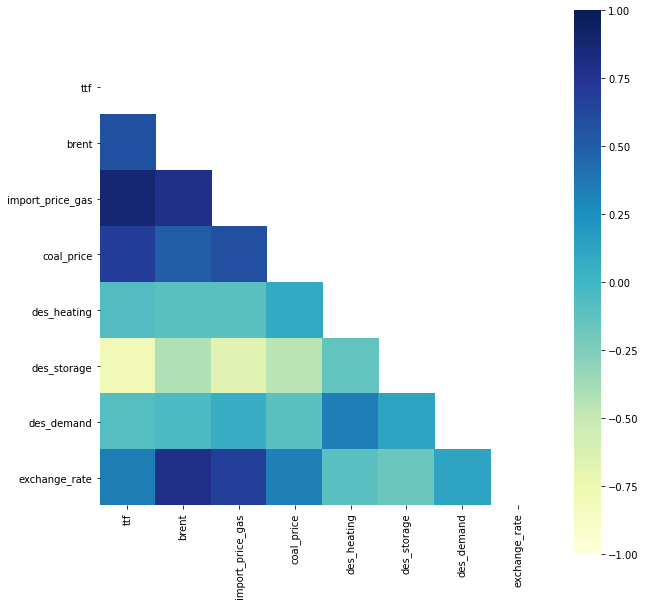

In [ ]:
# create an array like the argument, but made of zeros
corrs = data[["ttf","brent","import_price_gas","coal_price","des_heating","des_storage","des_demand","exchange_rate"]].corr()
mask_corr = np.zeros_like(corrs)

# map True onto the upper triangle of the mask
mask_corr[np.triu_indices_from(mask_corr)] = True

#sns allows not to show the cells for which mask is true
sns.heatmap(corrs,vmin=-1,vmax=1,mask=mask_corr,cmap="YlGnBu",square=True)

In [ ]:
corrs

,ttf,brent,import_price_gas,coal_price,des_heating,des_storage,des_demand
ttf,1.000000,0.573596,0.889081,0.687655,-0.064777,-0.781461,-0.085688
brent,0.573596,1.000000,0.791705,0.497389,-0.113847,-0.414328,-0.042426
import_price_gas,0.889081,0.791705,1.000000,0.589459,-0.109216,-0.668647,0.055988
coal_price,0.687655,0.497389,0.589459,1.000000,0.088683,-0.455009,-0.113495
des_heating,-0.064777,-0.113847,-0.109216,0.088683,1.000000,-0.140513,0.337541
des_storage,-0.781461,-0.414328,-0.668647,-0.455009,-0.140513,1.000000,0.123711
des_demand,-0.085688,-0.042426,0.055988,-0.113495,0.337541,0.123711,1.000000


## Normality check

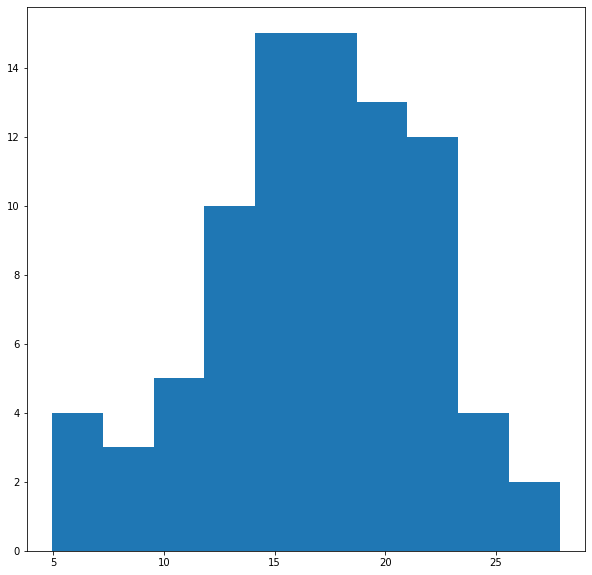

In [ ]:
plt.hist(data["ttf"])
plt.show()

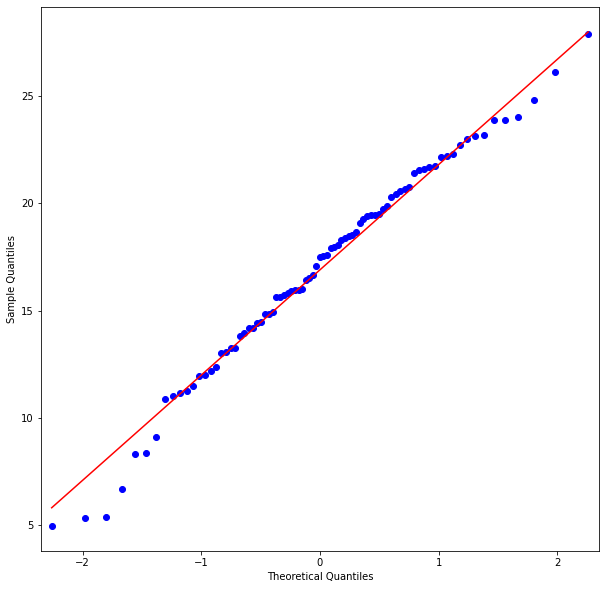

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(data["ttf"], line='s')
plt.show()

## Differencing

In [ ]:
data_ols = pd.read_csv('full_data.csv')
data_ols["ttf"] = data_ols["ttf"].diff()
data_ols["brent"] = data_ols["brent"].diff()
data_ols["coal_price"] = data_ols["coal_price"].diff()
data_ols["des_storage"] = (data_ols["des_storage"].diff())/100
data_ols["exchange_rate"] = data_ols["exchange_rate"].diff()
data_ols = data_ols.dropna()

In [ ]:
data_ols

,month,ttf,brent,import_price_gas,coal_price,exchange_rate,des_heating,heating,des_storage,storage,des_demand,demand
1,2014-03,-0.856689,-0.848492,10.8800,2.100000,0.017280,94.716456,165.501250,51.525440,49656.000,364.027330,609.346154
2,2014-04,-2.500286,0.194286,10.7300,-0.207143,-0.001943,109.484086,109.102083,50.492277,46999.000,499.223059,253.615385
3,2014-05,-1.146853,1.167619,10.2000,-0.033333,-0.006025,135.508462,71.290833,-36.556163,52790.000,546.123982,132.884615
4,2014-06,-1.969909,2.760952,9.7700,-2.419048,-0.014908,133.200103,31.794375,-19.944557,61207.000,525.338989,56.076923
5,2014-07,-0.867652,-4.138095,9.2700,1.568615,-0.004587,124.495491,13.505000,-24.247438,69706.000,475.702188,34.461538
...,...,...,...,...,...,...,...,...,...,...,...,...
78,2020-08,2.925967,1.768593,2.8619,-0.219156,0.037287,133.660994,26.067917,-47.520704,100794.186,566.492671,127.177594
79,2020-09,3.174017,-3.287548,3.9521,3.911905,-0.003102,121.295249,38.826250,-58.479798,107954.830,500.820834,202.861537
80,2020-10,2.685455,-0.156045,4.8896,2.566342,-0.002683,119.282031,101.838958,-26.840161,112281.744,522.992916,441.466063
81,2020-11,-0.234758,1.952967,4.8358,-2.209318,0.005975,108.879249,164.028750,-36.187530,109806.650,340.527595,621.333029


In [ ]:
data_ols.columns = ["month","D_ttf","D_brent","import_price_gas","D_coal",'D_exchange_rae',"des_heating","heating",
                "D_des_storage","storage","des_demand","demand"]

In [ ]:
data_ols

,month,D_ttf,D_brent,import_price_gas,D_coal,D_exchange_rae,des_heating,heating,D_des_storage,storage,des_demand,demand
1,2014-03,-0.856689,-0.848492,10.8800,2.100000,0.017280,94.716456,165.501250,51.525440,49656.000,364.027330,609.346154
2,2014-04,-2.500286,0.194286,10.7300,-0.207143,-0.001943,109.484086,109.102083,50.492277,46999.000,499.223059,253.615385
3,2014-05,-1.146853,1.167619,10.2000,-0.033333,-0.006025,135.508462,71.290833,-36.556163,52790.000,546.123982,132.884615
4,2014-06,-1.969909,2.760952,9.7700,-2.419048,-0.014908,133.200103,31.794375,-19.944557,61207.000,525.338989,56.076923
5,2014-07,-0.867652,-4.138095,9.2700,1.568615,-0.004587,124.495491,13.505000,-24.247438,69706.000,475.702188,34.461538
...,...,...,...,...,...,...,...,...,...,...,...,...
78,2020-08,2.925967,1.768593,2.8619,-0.219156,0.037287,133.660994,26.067917,-47.520704,100794.186,566.492671,127.177594
79,2020-09,3.174017,-3.287548,3.9521,3.911905,-0.003102,121.295249,38.826250,-58.479798,107954.830,500.820834,202.861537
80,2020-10,2.685455,-0.156045,4.8896,2.566342,-0.002683,119.282031,101.838958,-26.840161,112281.744,522.992916,441.466063
81,2020-11,-0.234758,1.952967,4.8358,-2.209318,0.005975,108.879249,164.028750,-36.187530,109806.650,340.527595,621.333029


In [ ]:
data_ols['LNG_dummy'] = (data_ols["month"] >= "2016-9-01" ).astype(int)
data_ols

,month,D_ttf,D_brent,import_price_gas,D_coal,D_exchange_rae,des_heating,heating,D_des_storage,storage,des_demand,demand,LNG_dummy
1,2014-03,-0.856689,-0.848492,10.8800,2.100000,0.017280,94.716456,165.501250,51.525440,49656.000,364.027330,609.346154,0
2,2014-04,-2.500286,0.194286,10.7300,-0.207143,-0.001943,109.484086,109.102083,50.492277,46999.000,499.223059,253.615385,0
3,2014-05,-1.146853,1.167619,10.2000,-0.033333,-0.006025,135.508462,71.290833,-36.556163,52790.000,546.123982,132.884615,0
4,2014-06,-1.969909,2.760952,9.7700,-2.419048,-0.014908,133.200103,31.794375,-19.944557,61207.000,525.338989,56.076923,0
5,2014-07,-0.867652,-4.138095,9.2700,1.568615,-0.004587,124.495491,13.505000,-24.247438,69706.000,475.702188,34.461538,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,2020-08,2.925967,1.768593,2.8619,-0.219156,0.037287,133.660994,26.067917,-47.520704,100794.186,566.492671,127.177594,1
79,2020-09,3.174017,-3.287548,3.9521,3.911905,-0.003102,121.295249,38.826250,-58.479798,107954.830,500.820834,202.861537,1
80,2020-10,2.685455,-0.156045,4.8896,2.566342,-0.002683,119.282031,101.838958,-26.840161,112281.744,522.992916,441.466063,1
81,2020-11,-0.234758,1.952967,4.8358,-2.209318,0.005975,108.879249,164.028750,-36.187530,109806.650,340.527595,621.333029,1


## Regression

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(data_ols[["D_brent","D_coal","D_des_storage","des_heating","LNG_dummy",'D_exchange_rae']])
model = sm.OLS(data_ols['D_ttf'],X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  D_ttf   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     12.08
Date:                Fri, 02 Jul 2021   Prob (F-statistic):           1.87e-09
Time:                        22:39:29   Log-Likelihood:                -132.30
No. Observations:                  82   AIC:                             278.6
Df Residuals:                      75   BIC:                             295.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -2.7698      1.059     -2.

# **Grange Causality**

In [ ]:
maxlag=2
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not granger cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(data_diff, variables = data_diff.columns)

,ttf_x,brent_x,coal_price_x,des_storage_x,des_heating_x
ttf_y,1.0000,0.4610,0.0459,0.0854,0.1359
brent_y,0.5395,1.0000,0.0895,0.2046,0.1131
coal_price_y,0.1426,0.1651,1.0000,0.1747,0.1760
des_storage_y,0.0031,0.5752,0.1854,1.0000,0.0018
des_heating_y,0.3481,0.9625,0.2025,0.0257,1.0000


# **New Heating Index**

In [ ]:
new_heating = pd.read_csv("HDD.csv", sep = ';')

In [ ]:
def nuts(a):
  if a == "BE":
    return "Others"
  if a == "BG":
    return "Others"
  if a == "CZ":
    return "Others"
  if a == "DK":
    return "Others"
  if a == "DE":
    return "Others"
  if a == "EE":
    return "Others"
  if a == "IE":
    return "Others"
  if a == "EL":
    return "Others"
  if a == "FR":
    return "Others"
  if a == "ES":
    return "Others"
  if a == "HR":
    return "Others"
  if a == "IT":
    return "Others"
  if a == "LV":
    return "Others"
  if a == "LT":
    return "Others"
  if a == "HU":
    return "Others"
  if a == "NL":
    return "Others"
  if a == "AT":
    return "Others"
  if a == "PL":
    return "Others"
  if a == "PT":
    return "Others"
  if a == "RO":
    return "Others"
  if a == "SI":
    return "Others"
  if a == "SK":
    return "Others"
  if a == "FI":
    return "Others"
  if a == "SE":
    return "Others"
  if a == "UK":
    return "Others"
  if a == "TR":
    return "Others"
  if a.startswith("BE"):
    return "Belgium"
  if a.startswith("BG"):
    return "Bulgaria"
  if a.startswith("CZ"):
    return "Czechia"
  if a.startswith("DK"):
    return "Denmark"
  if a.startswith("DE"):
    return "Germany"
  if a.startswith("EE"):
    return "Estonia"
  if a.startswith("IE"):
    return "Ireland"
  if a.startswith("EL"):
    return "Greece"
  if a.startswith("FR"):
    return "France"
  if a.startswith("ES"):
    return "Spain"
  if a.startswith("HR"):
    return "Croatia"
  if a.startswith("IT"):
    return "Italy"
  if a.startswith("LV"):
    return "Latvia"
  if a.startswith("LT"):
    return "Lithuania"
  if a.startswith("HU"):
    return "Hungary"
  if a.startswith("NL"):
    return "Netherlands"
  if a.startswith("AT"):
    return "Austria"
  if a.startswith("PL"):
    return "Poland"
  if a.startswith("PT"):
    return "Portugal"
  if a.startswith("RO"):
    return "Romania"
  if a.startswith("SI"):
    return "Slovenia"
  if a.startswith("SK"):
    return "Slovakia"
  if a.startswith("FI"):
    return "Finland"
  if a.startswith("SE"):
    return "Sweden"
  if a.startswith("UK"):
    return "United Kingdom"
  if a.startswith("TR"):
    return "Turkey"
  else:
    return "Others"

In [ ]:
new_heating['NUTS_CODE'] = new_heating['NUTS_CODE'].apply(nuts)

In [ ]:
new_heating = new_heating[new_heating['NUTS_CODE']!= 'Others']

In [ ]:
new_heating['DAY'] = np.ones(len(new_heating))

In [ ]:
new_heating['month'] = pd.to_datetime(new_heating[["YEAR", "MONTH", "DAY"]]).dt.to_period("M")

In [ ]:
new_heating = new_heating[['NUTS_CODE', 'HDD', 'month']]

In [ ]:
new_heating = new_heating.groupby("month").sum()

In [ ]:
new_heating

,HDD
month,
2014-01,738711.31
2014-02,587986.16
2014-03,515924.23
2014-04,324909.11
2014-05,228717.86
...,...
2020-08,21848.55
2020-09,107619.75
2020-10,324946.57


In [ ]:
new_heating.to_csv("new_heating.csv")

In [ ]:
files.download('new_heating.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>